# 1. 문제해결을 위한 업무플로우 제작

In [ ]:
#이미지확보 (바이크/버스)
# 이미지 다운로드

#데이터 다운로드
# [PC/colab 통합]파일다운로드(기본) 및 압축파일 해제
# !pip install gdown==4.5.1
# import gdown
# import zipfile
# # https://drive.google.com/file/d/1tl75HY2vZr7Mrag2Pd4-5tZsa5B3-YPt/view?usp=sharing
# google_path = "https://drive.google.com/uc?id="
# file_id = '1tl75HY2vZr7Mrag2Pd4-5tZsa5B3-YPt'
# output_name = "bus_bike_data.zip"
# gdown.download(google_path+file_id,output_name,quiet=False)
# fantasy_zip = zipfile.ZipFile("bus_bike_data.zip")
# fantasy_zip.extractall()


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14958 sha256=20c831e0debf2ba229ecbdb15f50fadcf942ebd0f382c2601d2ff35e0ff60748
  Stored in directory: c:\users\mk-desktop\appdata\local\pip\cache\wheels\38\72\83\dab5cb8321023eb1549d7a7d7f564b479ed4cf71edb70ddad6
Successfully built gdown


Downloading...
From: https://drive.google.com/uc?id=1tl75HY2vZr7Mrag2Pd4-5tZsa5B3-YPt
To: C:\Users\MK-Desktop\Desktop\bhyunco_class\udemy\수업자료\04\09. 이미지 양품,불량품 판단 프로그램(딥러닝)\완성본\bus_bike_data.zip
100%|█████████████████████████████████████████████████████████████████████████████| 12.8M/12.8M [00:00<00:00, 25.8MB/s]


- 딥러닝 이미지 판별 프로그램 구동방식
- https://chat.openai.com/share/d322f396-a547-4a8c-9c39-be9d6ecb2ae2

1. 수집된 이미지 데이터(training_data 폴더)에 있는 파일을 bus_dataset(training_data/bus) / bike_dataset(training_data/bike)으로 저장하기.
2. 데이터 전처리
    2-1. 이미지 리사이징하여 224 X 224 로 맞추기
    2-2. 색상정규화를 통해 픽셀값을 0~1사이로 정규화하기
    2-3. 데이터증강을 통해 회전/확대,축소/반전 등의 방법으로 이미지 변형하기
    2-4. 데이터 분할 80%는 학습데이터로, 20%는 검증데이터로 제작하여 각각 train / test 변수에 저장하기
3. 모델 구축하기
    3-1. TensorFlow 라이브러리를 사용해서 이미지 판별 모델을 구축(CNN모델 활용)
    
4. 모델 학습하기
    4-1. 전처리된 학습데이터를 사용하여 모델 학습
    4-2. 학습 중 검증 데이터를 사용하여 모델의 성능 확인하면서 최적의 모델로 발전

5. 모델 평가
    5-1. 검증 데이터를 사용하여 모델의 성능을 평가
  
6. 모델 활용
    6-1. 새로운 이미지 데이터가 입력되었을 떄 bike인지 bus인지 판별하는 기능 제작

# 2. ChatGPT를 통한 코드 생성

- https://chat.openai.com/share/b496c86b-1213-477c-baee-988d824b09be

In [1]:
# 파이썬으로 아래의 기능을 구현해줘. 물어보지 않은 것은 대답하지말아줘

# # 1. 수집된 이미지 데이터(training_data 폴더)에 있는 파일을 변수에 담을거야.

#  bus_dataset변수에는 (training_data/bus) 의 파일이름을  저장해주고
# bike_dataset변수에는 (training_data/bike)의 파일이름을 저장해줘

import os

# training_data 폴더 경로 설정
training_data_dir = 'training_data'

# bus 폴더 내 파일 이름 가져오기
bus_dir = os.path.join(training_data_dir, 'bus')
bus_dataset = os.listdir(bus_dir)

# bike 폴더 내 파일 이름 가져오기
bike_dir = os.path.join(training_data_dir, 'bike')
bike_dataset = os.listdir(bike_dir)

# 결과 출력
print("bus_dataset:", bus_dataset)
print("bike_dataset:", bike_dataset)


bus_dataset: ['bus001.jpg', 'bus002.jpg', 'bus003.jpg', 'bus004.jpg', 'bus005.jpg', 'bus006.jpg', 'bus007.jpg', 'bus008.jpg', 'bus009.jpg', 'bus010.jpg', 'bus011.jpg', 'bus012.jpg', 'bus013.jpg', 'bus014.jpg', 'bus015.jpg', 'bus016.jpg', 'bus017.jpg', 'bus018.jpg', 'bus019.jpg', 'bus020.jpg', 'bus021.jpg', 'bus022.jpg', 'bus023.jpg', 'bus024.jpg', 'bus025.jpg', 'bus026.jpg', 'bus027.jpg', 'bus028.jpg', 'bus029.jpg', 'bus030.jpg', 'bus031.jpg', 'bus032.jpg', 'bus033.jpg', 'bus034.jpg', 'bus035.jpg', 'bus036.jpg', 'bus037.jpg', 'bus038.jpg', 'bus039.jpg', 'bus040.jpg', 'bus041.jpg', 'bus042.jpg', 'bus043.jpg', 'bus044.jpg', 'bus045.jpg', 'bus046.jpg', 'bus047.jpg', 'bus048.jpg', 'bus049.jpg', 'bus050.jpg', 'bus051.jpg', 'bus052.jpg', 'bus053.jpg', 'bus054.jpg', 'bus055.jpg', 'bus056.jpg', 'bus057.jpg', 'bus058.jpg', 'bus059.jpg', 'bus060.jpg', 'bus061.jpg', 'bus062.jpg', 'bus063.jpg', 'bus064.jpg', 'bus065.jpg', 'bus066.jpg', 'bus067.jpg', 'bus068.jpg', 'bus069.jpg', 'bus070.jpg', 'bus07

In [17]:
# 2. 데이터 전처리
#     2-1. 이미지 리사이징하여 224 X 224 로 맞추기
#     2-2. 색상정규화를 통해 픽셀값을 0~1사이로 정규화하기
#     2-3. 데이터증강을 통해 회전/확대,축소/반전 등의 방법으로 이미지 변형하기
#     2-4. 데이터 분할 80%는 학습데이터로, 20%는 검증데이터로 제작하여 각각 train / test 변수에 저장하기
!pip install tensorflow==2.15.0
!pip install scikit-learn==1.4.0
!pip install matplotlib==3.8.3
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. 파일 이름 가져오기 (이미 이전 단계에서 수행한 코드)

# 2-1. 이미지 리사이징
image_size = (224, 224)

def resize_images(dataset, source_dir):
    resized_images = []
    for filename in dataset:
        img = Image.open(os.path.join(source_dir, filename))
        img = img.resize(image_size, Image.Resampling.LANCZOS)
        # img = img.resize(image_size, Image.ANTIALIAS)
        
        resized_images.append(np.array(img))
    return np.array(resized_images)

bus_resized = resize_images(bus_dataset, bus_dir)
bike_resized = resize_images(bike_dataset, bike_dir)

# 2-2. 색상 정규화
bus_resized = bus_resized / 255.0
bike_resized = bike_resized / 255.0

# 2-3. 데이터 증강 (예시: 회전, 확대, 축소, 반전)
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 2-4. 데이터 분할
X = np.concatenate((bus_resized, bike_resized), axis=0)
y = np.concatenate((np.zeros(len(bus_resized)), np.ones(len(bike_resized))), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 출력
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


     ---------------------------------------- 7.6/7.6 MB 30.5 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ------------------------------------- 186.7/186.7 kB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 27.8 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)


X_train shape: (317, 224, 224, 3)
X_test shape: (80, 224, 224, 3)
y_train shape: (317,)
y_test shape: (80,)


In [15]:
# 3. 모델 구축하기
#     3-1. TensorFlow 라이브러리를 사용해서 이미지 판별 모델을 구축(CNN모델 활용)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 모델 생성
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 요약
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

Epoch 1/10
8/8 [==============================] - 16s 2s/step - loss: 0.0729 - accuracy: 0.9684 - val_loss: 0.9171 - val_accuracy: 0.7969
Epoch 2/10
8/8 [==============================] - 16s 2s/step - loss: 0.0686 - accuracy: 0.9723 - val_loss: 0.9329 - val_accuracy: 0.7969
Epoch 3/10
8/8 [==============================] - 15s 2s/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.1960 - val_accuracy: 0.8438
Epoch 4/10
8/8 [==============================] - 15s 2s/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.1701 - val_accuracy: 0.7969
Epoch 5/10
8/8 [==============================] - 15s 2s/step - loss: 0.0106 - accuracy: 0.9960 - val_loss: 1.1538 - val_accuracy: 0.8281
Epoch 6/10
8/8 [==============================] - 15s 2s/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 1.5503 - val_accuracy: 0.7656
Epoch 7/10
8/8 [==============================] - 15s 2s/step - loss: 0.0410 - accuracy: 0.9802 - val_loss: 1.1812 - val_accuracy: 0.7656
Epoch 8/10
8/8 [==================

C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL S

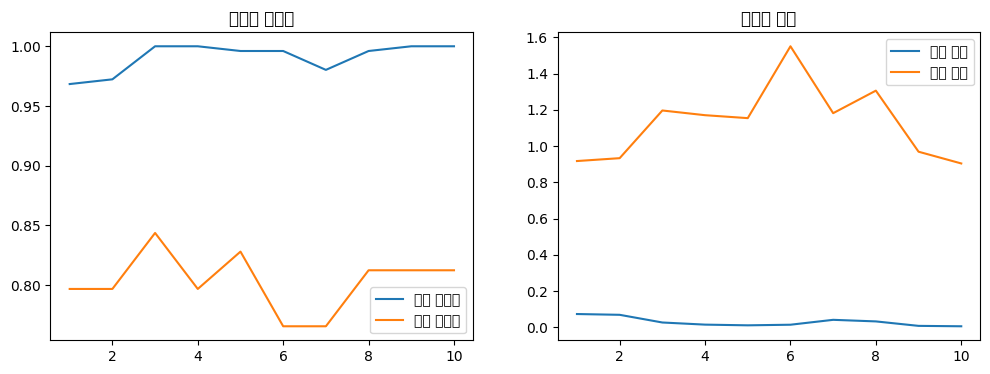

In [19]:

# 4. 모델 학습하기
#     4-1. 전처리된 학습데이터를 사용하여 모델 학습
#     4-2. 학습 중 검증 데이터를 사용하여 모델의 성능 확인하면서 최적의 모델로 발전
# 4-1. 모델 학습
batch_size = 32
epochs = 10  # 적절한 에폭 수를 설정하세요.

# 모델 학습
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# 4-2. 모델 성능 확인
# 검증 데이터를 사용하여 모델의 성능 확인
loss, accuracy = model.evaluate(X_test, y_test)
print("검증 데이터 손실:", loss)
print("검증 데이터 정확도:", accuracy)

# 학습 곡선 그리기
import matplotlib.pyplot as plt

# 정확도와 손실 값을 가져옴
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 에폭에 따른 정확도 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_accuracy, label='학습 정확도')
plt.plot(range(1, epochs+1), val_accuracy, label='검증 정확도')
plt.legend()
plt.title('에폭별 정확도')

# 에폭에 따른 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_loss, label='학습 손실')
plt.plot(range(1, epochs+1), val_loss, label='검증 손실')
plt.legend()
plt.title('에폭별 손실')

plt.show()


In [21]:
# 5. 모델 평가
#     5-1. 검증 데이터를 사용하여 모델의 성능을 평가
# 5-1. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("검증 데이터 손실:", loss)
print("검증 데이터 정확도:", accuracy)


3/3 [==============================] - 1s 218ms/step - loss: 0.3299 - accuracy: 0.9375
검증 데이터 손실: 0.3299156427383423
검증 데이터 정확도: 0.9375


In [28]:
# 6. 모델 활용
#     6-1. 새로운 이미지 데이터가 입력되었을 떄 bike인지 bus인지 판별하는 기능 제작
from PIL import Image
import numpy as np

# 이미지를 불러와 모델에 입력할 수 있는 형태로 전처리하는 함수
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224), Image.Resampling.LANCZOS)
    img = np.array(img)
    img = img / 255.0  # 색상 정규화
    return img

# 입력 이미지 경로 설정
input_image_path = '검증용_버스이미지1.jpg'  # 자전거 또는 버스 이미지 경로를 설정하세요.

# 이미지 전처리
input_image = preprocess_image(input_image_path)

# 모델을 사용하여 이미지 판별
prediction = model.predict(np.expand_dims(input_image, axis=0))

# 예측 결과 출력
if prediction < 0.5:
    print("이미지는 버스입니다.")
else:
    print("이미지는 자전거입니다.")


1/1 [==============================] - 0s 33ms/step
이미지는 버스입니다.


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 모델 생성
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 학습률 조정
              metrics=['accuracy'])

# 모델 요약
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 256)      

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# 데이터 분할
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kfold.split(X, y):
    # 모델 생성
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(2, 2))

    # Convolutional Layer 2
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    # Convolutional Layer 3
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # 모델 컴파일
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])

    # 모델 학습
    history = model.fit(X[train_idx], y[train_idx], batch_size=32, epochs=30, validation_data=(X[val_idx], y[val_idx]), verbose=0)

    # 검증 데이터로 평가
    loss, accuracy = model.evaluate(X[val_idx], y[val_idx], verbose=0)
    print("검증 데이터 정확도:", accuracy)
    cv_scores.append(accuracy)

# Cross-validation 평균 정확도 출력
print("평균 검증 데이터 정확도:", np.mean(cv_scores))



KeyboardInterrupt



In [ ]:
# 6. 모델 활용
#     6-1. 새로운 이미지 데이터가 입력되었을 떄 bike인지 bus인지 판별하는 기능 제작
from PIL import Image
import numpy as np

# 이미지를 불러와 모델에 입력할 수 있는 형태로 전처리하는 함수
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224), Image.ANTIALIAS)
    img = np.array(img)
    img = img / 255.0  # 색상 정규화
    return img

# 입력 이미지 경로 설정
input_image_path = '검증용_버스이미지2.jpg'  # 자전거 또는 버스 이미지 경로를 설정하세요.

# 이미지 전처리
input_image = preprocess_image(input_image_path)

# 모델을 사용하여 이미지 판별
prediction = model.predict(np.expand_dims(input_image, axis=0))

# 예측 결과 출력
if prediction < 0.5:
    print("이미지는 버스입니다.")
else:
    print("이미지는 자전거입니다.")


# 3. 수동으로 코드 수정

In [ ]:
#학습데이터의 개수